In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/louishgy/churn-modelling/Churn_Modelling.csv


In [56]:
df=pd.read_csv("/kaggle/input/d/louishgy/churn-modelling/Churn_Modelling.csv")

In [57]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
df.shape

(10000, 14)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [60]:
df.duplicated().sum()

0

In [61]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [62]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [63]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [65]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [67]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
#get_dummies is used same as one hot encoder in python

In [72]:
df=df.astype(int)

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x=df.drop(columns=['Exited'])
y=df['Exited']

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler=StandardScaler()

In [82]:
x_train_scaled=scaler.fit_transform(x_train)

In [83]:
x_test_scaled=scaler.fit_transform(x_test)

In [84]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [85]:
import tensorflow

2025-05-23 11:52:09.679654: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748001129.986363      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748001130.071632      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [86]:
from tensorflow import keras

In [88]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [113]:
model=Sequential()
model.add(Dense(6,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [114]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79 (316.00 B)

 Trainable params: 79 (316.00 B)

 Non-trainable params: 0 (0.00 B)

In [123]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [124]:
#model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
#validation let our model train on 8000 data and on that 8000 data 0.2 validation score mean seperate 2000 customer and test on these customer simultaneously
#and give tha accurac score

#metrics =accuracy is used to get the accuracy score


In [132]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8626 - loss: 0.3455 - val_accuracy: 0.8419 - val_loss: 0.3597
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8553 - loss: 0.3561 - val_accuracy: 0.8425 - val_loss: 0.3599
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8537 - loss: 0.3540 - val_accuracy: 0.8419 - val_loss: 0.3597
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8526 - loss: 0.3568 - val_accuracy: 0.8425 - val_loss: 0.3600
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8550 - loss: 0.3544 - val_accuracy: 0.8419 - val_loss: 0.3599
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8585 - loss: 0.3528 - val_accuracy: 0.8425 - val_loss: 0.3596
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8603 - loss: 0.3510 - val_accuracy: 0.8419 - val_loss: 0.3597
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8573 - loss: 0.3495 - val_accu

In [126]:
model.layers[0].get_weights()

[array([[ 2.2017482e-01, -7.6446511e-02, -4.2821050e-02, -2.3372039e-02,
          3.2713890e-01, -1.1629464e-01],
        [ 7.0179254e-02, -3.2063284e+00, -2.7572932e+00,  8.7433881e-01,
         -2.8115852e+00,  5.8182418e-01],
        [ 4.7469214e-01,  4.1520464e-01,  3.1432608e-01,  2.5947470e-02,
         -5.0711071e-01, -7.4767858e-02],
        [-2.1212344e+00, -3.2768126e-03, -1.7940755e+00,  2.2414370e+00,
         -1.2867175e-01, -3.9824593e-01],
        [-1.1377959e+00, -9.2007506e-01, -8.9306325e-01,  4.3541527e+00,
         -4.6966904e-01, -2.9861081e+00],
        [-4.5896381e-02,  7.0271343e-01,  3.5884362e-01,  9.1932081e-02,
         -6.4637434e-01,  2.3783652e-01],
        [ 1.3704710e+00, -4.9158642e-01, -1.2247440e+00, -1.1280096e-01,
         -2.0912764e+00,  5.4604840e+00],
        [-8.4525041e-02, -1.3166872e-01, -6.4334422e-01,  6.6800490e-02,
          2.1807832e-01,  3.4417769e-01],
        [-5.7058758e-01,  6.6123486e-01,  2.5739872e-01, -1.3618611e+00,
       

In [127]:
model.layers[1].get_weights()

[array([[-1.2204844],
        [-1.221759 ],
        [-1.2852874],
        [-2.7947974],
        [-1.9248531],
        [-2.303281 ]], dtype=float32),
 array([3.9998317], dtype=float32)]

In [128]:
y_log=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [129]:
y_pred=np.where(y_log>0.5,1,0)

In [130]:
from sklearn.metrics import accuracy_score

In [131]:
accuracy_score(y_test,y_pred)

0.8565

In [133]:
import matplotlib.pyplot as plt

In [ ]:
history

In [135]:
history.history

{'accuracy': [0.8576562404632568,
  0.8578125238418579,
  0.8571875095367432,
  0.8568750023841858,
  0.8575000166893005,
  0.8578125238418579,
  0.8570312261581421,
  0.8575000166893005,
  0.8576562404632568,
  0.8575000166893005,
  0.8570312261581421,
  0.8568750023841858,
  0.8573437333106995,
  0.8573437333106995,
  0.8579687476158142,
  0.8570312261581421,
  0.8578125238418579,
  0.8571875095367432,
  0.8579687476158142,
  0.8578125238418579,
  0.8573437333106995,
  0.8573437333106995,
  0.8575000166893005,
  0.8584374785423279,
  0.8582812547683716,
  0.8571875095367432,
  0.8582812547683716,
  0.8589062690734863,
  0.8581249713897705,
  0.8582812547683716,
  0.8575000166893005,
  0.8587499856948853,
  0.8589062690734863,
  0.8582812547683716,
  0.8576562404632568,
  0.8579687476158142,
  0.8592187762260437,
  0.8571875095367432,
  0.8595312237739563,
  0.8571875095367432,
  0.8595312237739563,
  0.8575000166893005,
  0.8575000166893005,
  0.8587499856948853,
  0.8576562404632568

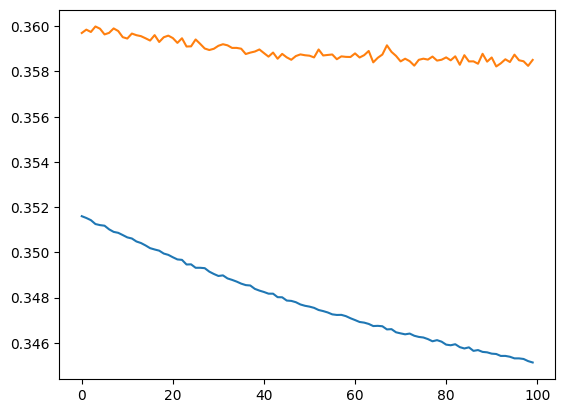

In [137]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


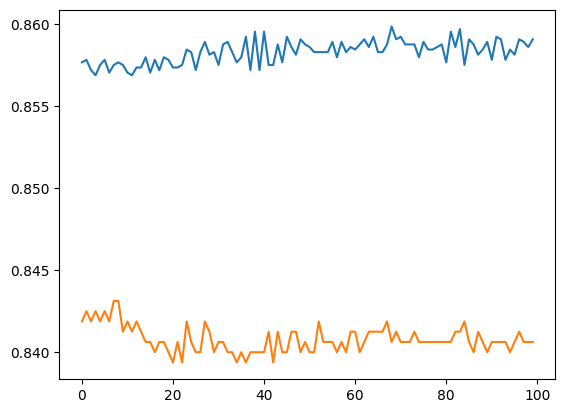

In [138]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])